In [66]:
import numpy as np
import pandas as pd
import seaborn as sns

sns.set_theme()
sns.set_context('talk')

In [67]:
#2020
abortion = pd.read_csv("abortion_laws.csv", skiprows=2)
abortion = abortion.drop(columns=["Footnotes"])
abortion = abortion[1:52]
abortion.head()

,Location,Pre-Roe Abortion Ban Still State Law,State Law Expressing Intent to Limit Abortion to Maximum Extent Permitted,State Law Protecting the Right to Abortion
1,Alabama,Yes,No,No
2,Alaska,No,No,No
3,Arizona,Yes,No,No
4,Arkansas,Yes,Yes,No
5,California,No,No,Yes


In [68]:
#group into 3: significant restrictions on abortion, significant protections, neither
abortion['Abortion Overview'] = 0
abortion.loc[(abortion['Pre-Roe Abortion Ban Still State Law'] == 'Yes') | (abortion['State Law Expressing Intent to Limit Abortion to Maximum Extent Permitted'] == 'Yes'),'Abortion Overview'] = 'significantly restricted'
abortion.loc[(abortion['State Law Protecting the Right to Abortion'] == 'Yes'),'Abortion Overview'] = 'protected'
abortion.loc[(abortion['Abortion Overview'] == 0),'Abortion Overview'] = 'neither'
abortion.head()

,Location,Pre-Roe Abortion Ban Still State Law,State Law Expressing Intent to Limit Abortion to Maximum Extent Permitted,State Law Protecting the Right to Abortion,Abortion Overview
1,Alabama,Yes,No,No,significantly restricted
2,Alaska,No,No,No,neither
3,Arizona,Yes,No,No,significantly restricted
4,Arkansas,Yes,Yes,No,significantly restricted
5,California,No,No,Yes,protected


In [69]:
#2014
childcare = pd.read_csv("childcare_states.csv", skiprows=1)
childcare = childcare[:51]
childcare.head()

,State,"Average Annual Cost of Full-Time Infant Care in a Center as Percent of Women's Median Annual Earnings, 2013a","Cost of Infant Care as Percent of Women's Median Annual Earningsa,b",Rank,"Percent of Four-Year-Olds Enrolled in State Pre-K, Preschool Special Education, and State and Federal Head Start, 2012–2013c",Rank,"Preschool Quality Standards (out of 10), 2012–2013c",Rank.1,Child Care Total Score,Rank.2
0,Alabama,"$5,547",16.8%,1.0,22.9%,35.0,10.0,1.0,1.42,11.0
1,Alaska,"$10,280",23.9%,16.0,21.7%,38.0,10.0,1.0,1.37,15.0
2,Arizona,"$9,166",25.5%,23.0,19.0%,41.0,5.0,35.0,0.97,39.0
3,Arkansas,"$5,933",19.8%,7.0,50.6%,13.0,9.0,5.0,1.54,5.0
4,California,"$11,628",27.7%,33.0,28.7%,27.0,4.0,37.0,0.95,40.0


In [70]:
df = abortion.merge(childcare, how='inner', left_on='Location', right_on="State")
df = df.drop('Location', axis=1)
df = df[['State','Abortion Overview','Child Care Total Score']]
df.head()

,State,Abortion Overview,Child Care Total Score
0,Alabama,significantly restricted,1.42
1,Alaska,neither,1.37
2,Arizona,significantly restricted,0.97
3,Arkansas,significantly restricted,1.54
4,California,protected,0.95


<AxesSubplot:xlabel='Abortion Overview', ylabel='Child Care Total Score'>

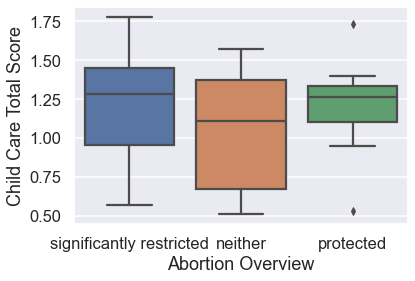

In [71]:
sns.boxplot(data=df, x="Abortion Overview", y="Child Care Total Score")

While mean childcare scores are similar across states with significant restrictions on abortion and states where abortion is protected, there is greater variation in childcare access and quality in states where abortion is significantly restricted compared to states where childcare is protected.

In [72]:
df.to_csv('abortion-childcare.csv')